# More on simple linear regression
## A statistical model for linear regression

Thus far, we've treated fitting a regression model in a mostly heuristic way, by transforming features until the observed trend looks to be approximately linear. This is not ideal, for two primary reasons: first, it does not allow us to easily quantify _how_ linear a trend is, and second, the visual method will quickly become unweidly as soon as we consider multiple predictor variables, which can't be visualized on a single 2-d plot.

Thus, let's return to our simple linear model, and explicitly add in a term to account for noise. Suppose we start with a dataset of observations $(x_1,y_1),\dots,(x_n, y_n)$, and that we suspect the variables $y_i$ can be predicted as a linear function of the variables $x_i$, subject to some noise. We can write this model as

$$
y_i = \alpha + \beta x_i + \varepsilon_i
$$

The first part of this equation, $\alpha + \beta x_i$, is the same equation for a line that we saw earlier. However, now we've added a term $\varepsilon_i$ representing noise, so that our observations don't lie _exactly_ on a line. Instead, we assume that the observed value of $y_i$ is equal to the values predicted by the line $\hat{y}_i = \alpha + \beta x_i$, plus some noise $\varepsilon_i$.

Typically, we assume that the noise in our models satisfy some basic assumptions:

1. The noise is mean zero, so $\mathbb{E}[\varepsilon_i] = 0$. This implies that the conditional mean of $y_i$ given $x_i$ is a linear function of $x_i$, since
$$
\begin{align*}
\mathbb{E}[y_i \mid x_i] &= \mathbb{E}[\alpha + \beta x_i + \varepsilon_i\mid x_i]\\ &= \alpha + \beta x_i + \underbrace{\mathbb{E}[\varepsilon_i]}_{=0}\\ &= \alpha + \beta x_i
\end{align*}
$$
2. The variance of the noise is the same regardless of the value of $x_i$: $\text{Var}[\varepsilon_i] = \mathbb{E}[(\varepsilon_i - \mathbb{E}[\varepsilon_i])^2] = \mathbb{E}[\varepsilon_i^2] \equiv \sigma^2_\varepsilon$.
3. The errors are independent and identically distributed across different observations.

> Remark: in this setup, we are treating the observed values of $y_i$ as random, since they are a linear function plus some noise, but treating the values of $x_i$ as non-random. That is, we are never explicitly modeling a distribution over $x$ values.

In future sections, we will consider additional assumptions on the error terms $\varepsilon_i$ (in particular, we will assume that the errors come from a normal distribution), though this is not necessary for this section.


## Evaluating the statistical model

Now that we've formalized a statistical model for simple linear regression, we can develop some basic tools to evaluate how good of a fit the linear model is, and whether our statistical assumptions appear to hold.

### Fitting the model using least squares

Let's begin by returning to our example of height and weight from the previous section. First, we load in the dataset using `pandas`.

In [1]:
import pandas as pd

height_weight_data = pd.read_csv("datasets/height_weight.csv")

The model we're going to try to fit is

$$
\text{height}_i = \alpha + \beta \text{weight}_i + \varepsilon_i.
$$

Recall that we found the coefficients $\alpha,\beta$ by minimizing the sum of squared errors

$$
\sum_{i=1}^n (y_i - (\alpha+ \beta x_i))^2
$$

which, with some calculus, gives the solutions

$$
\begin{align*}
\hat{\alpha} &= \bar{y} - \hat{\beta} \bar{x}\\
\hat{\beta} &= \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^n (x_i-\bar{x})^2}
\end{align*}
$$

Note that since we found these solutions by minimizing the sum of squared errors, these solutions are often called the _least-squares solutions_ to the linear regression problem.

Now let's define the same function as before to find the least-squares coefficients.

In [2]:
import numpy as np

def fit_line(x, y):
    # first compute the means of the two vectors
    x_bar = np.mean(x)
    y_bar = np.mean(y)

    # compute numerator (1/n)*\sum_i (x_i - x_bar)*(y_i - y_bar)
    cov_xy = np.sum((x-x_bar)*(y-y_bar))/len(x)

    # compute the variance of x and y
    var_x = np.sum((x-x_bar)**2)/len(x)

    # compute beta_hat
    beta_hat = cov_xy/var_x

    # compute alpha_hat
    alpha_hat = y_bar - beta_hat*x_bar

    return alpha_hat, beta_hat

Next, let's create a joint plot of height against weight, and overlay the fitted regression line.

alpha = 137.08690903754507, beta = 0.5124931451830912


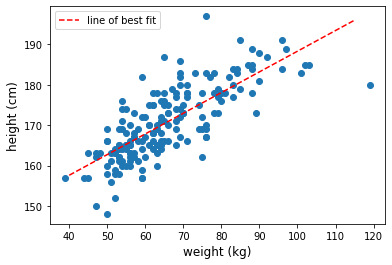

In [3]:
import matplotlib.pyplot as plt

weight = height_weight_data["weight"].to_numpy()
height = height_weight_data["height"].to_numpy()

alpha_hat, beta_hat = fit_line(weight, height)
print(f"alpha = {alpha_hat}, beta = {beta_hat}")

xx = np.linspace(40,115,4)
yy = alpha_hat + beta_hat*xx
plt.scatter(weight, height)
plt.plot(xx, yy, color='red', linestyle='--', label='line of best fit')
plt.ylabel("height (cm)", fontsize=12)
plt.xlabel("weight (kg)", fontsize=12)
plt.legend()
plt.show()

### Inspecting the residuals

Given a fitted regression model

$$
\hat{y}_i = \hat{\alpha} + \hat{\beta} x_i,
$$

the term quantity $r_i = y_i - \hat{y}_i$ is called the $i^{th}$ _residual_, and measures the error in the prediction of the $i^{th}$ observation. Note that the residual is a signed quantity, meaning it can be positive or negative depending on whether the observed value $y_i$ is above or below the fitted line $\hat{\alpha} + \hat{\beta} x_i$.

Note that the residual $r_i$ is a natural estimate of the observed error value $\varepsilon_i$. Therefore, inspecting the residuals can give us information about the distribution of errors in our statistical model.

First, let's compute the residuals for the height/weight regression we've just performed.

In [4]:
# compute the predicted height values using the linear model
height_hat = alpha_hat + beta_hat*weight

# compute the residuals
residuals = height - height_hat

Now recall that our first assumption about the errors $\varepsilon_i$ was that they were mean zero, and from our third assumption they are independent and identically distributed across observations. This means that the residuals should also have mean zero. Let's compute the mean and see if this is true.

In [5]:
residual_mean = np.mean(residuals)
residual_mean

1.736882242969134e-14

Indeed, the mean (up to numerical precision) exactly zero! It turns out that for the least squares fit, this is mathematically always true, since

$$
\begin{align*}
\bar{r} &= \frac{1}{n}\sum_{i=1}^n r_i \\&= \frac{1}{n}\sum_{i=1}^n (y_i - \hat{y_i})\\ &= \bar{y} - \frac{1}{n}\sum_{i=1}^n \hat{y}_i \\ &= \bar{y} -  \frac{1}{n}\sum_{i=1}^n (\hat{\alpha} + \hat{\beta} x_i)\\
&= \bar{y} - \hat{\alpha} - \hat{\beta}\bar{x}\\
&= \bar{y} - (\bar{y} - \hat{\beta}\bar{x}) - \hat{\beta}\bar{x}\\
&= 0
\end{align*}
$$

where for the second to last line we used the fact that $\hat{\alpha} = \bar{y} - \hat{\beta}\bar{x}$.


Since the mean is always zero, we can estimate the variance $\sigma^2_\varepsilon$ of the errors by computing the variance of the residuals, which is given by

$$
\frac{1}{n}\sum_{i=1}^n (r_i - \bar{r})^2 = \frac{1}{n}\sum_{i=1}^n r_i^2 = \frac{1}{n}\sum_{i=1}^n (y_i - \hat{y}_i)^2.
$$

In python, we can find this with the following.

In [6]:
residual_variance = np.mean(residuals**2)
residual_variance

32.82880880231438

Note that sometimes we use slightly different estimates for the variance, in particular you may see the quantity

$$
\frac{1}{n-2}\sum_{i=1}^n r_i^2
$$

used instead. When the number of samples $n$ is reasonably large, the difference is typically negligible. However, we will address these cases later when they arise.

The variance itself is a bit difficult to interpret, since it is not measured in the same units as the variable height itself. Instead, it is often easier to work with the square root of the variance, the standard deviation (or standard error) of the residuals.

In [7]:
residual_std = np.sqrt(residual_variance)
residual_std

5.729642990825377

The standard deviation of $\approx 5.7$ tells us that, on average, our predictions based on the linear model are off by about $5.7$kg (or approximately $11$lbs).

In addition to computing individual statistics like the mean and the variance, we can inspect the entire distribution of residuals by plotting a histogram.

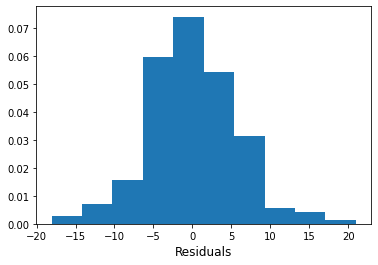

In [8]:
plt.hist(residuals, bins=10, density=True)
plt.xlabel("Residuals", fontsize=12)
plt.show()

From this histogram, it appears that the residuals follow a symmetric distribution with mean zero. It may even be reasonable to assume that these residuals follow a normal distribution. Indeed, soon we will do precisely this, which will give us more tools for evaluating regression models and performing statistical tests.

### The RSS, TSS and $R^2$

Besides looking at quantities like the variance or standard deviation of the residuals to assess the quality of fit, it is often useful to consider _relative_ measures of fit. That is, a measure which tells us how much better our fit is than some naive baseline. One such measure is the (squared) correlation coefficient, or $R^2$, which we derive here.

First, we need to define our baseline model. For this, we consider the even simpler model, which predicts $y_i$ as a constant plus some noise, so

$$
y_i = \alpha + \varepsilon_i.
$$

It turns out that if we fit this model by minimizing $\sum_i (y_i - \hat{\alpha})^2$, the solution is $\hat{\alpha} = \bar{y}$. We call the total error produced by this model the _total sum of squares_, or TSS, which is given by

$$
\text{TSS} = \sum_{i=1}^n (y_i - \bar{y})^2.
$$

The $TSS$ is also a measure of the intrinsic variance in the variable $Y$, independent of any predictor variables $x$.

We wish to compare this error to the error from the linear regression model, which is called the _residual sum of squares_, or RSS, and is given by

$$
\text{RSS} = \sum_{i=1}^n (y_i - (\hat{\alpha} + \hat{\beta}x_i))^2.
$$

> Note that the RSS is really the same thing as the sum of squared errors SSE that we minimized to find the least squares fit. You may see both terms used, though traditionally when discussing regression diagonistics and $R^2$, the RSS seems to be the preferred terminology.

Now if our linear regression model is any good, we may hope that the difference between these two errors is large. We call this difference the _regression sum of squares_ or RegSS, which is given by

$$
\text{RegSS} = \text{TSS} - \text{RSS}.
$$

The regression sum of squares captures how much the error is reduced by consider the variable $x$ in the regression. The ratio of RegSS to TSS captures the proportion of error reduced by considering the variable $x$ in the regression, and is called the $R^2 = \text{RegSS}/\text{TSS}$. Intuitively, the $R^2$ value tells us what proportion of variance in the response variable $y$ can be explained by considering the predictor variable $x$.

Let's compute the RSS, TSS, RegSS and $R^2$ for our height/weight model in python. Let's start with the total sum of squares.

In [9]:
height_bar = np.mean(height)
TSS = np.sum((height - height_bar)**2)

Next, we can compute the RSS and the RegSS.

In [10]:
RSS = np.sum((height - height_hat)**2)
RegSS = TSS - RSS

Finally, we can compute the $R^2$ value.

In [11]:
R2 = RegSS/TSS
R2

0.5899403156425961

## Problems

1. Using basic calculus, show that $\text{argmin}_{\alpha} \sum_{i=1}^n (y_i - \alpha)^2 = \bar{y}$.
2. Show that $\text{RSS} \leq \text{TSS}$
3. Show that $TSS - RSS = \sum_{i=1}^n (\hat{y}_i - \bar{y})^2.